### Import Required Libraries for EDA

In [1]:
import numpy as np
import pandas as pd
import string

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Import Emotion Classification dataset from hugging face

In [2]:
from datasets import load_dataset
dataset = load_dataset("emotion")

Using custom data configuration default
Found cached dataset emotion (C:/Users/Lenovo/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705)


  0%|          | 0/3 [00:00<?, ?it/s]

### Save Dataset as csv files on the disk

In [19]:
for split, data in dataset.items():
    data.to_csv(f"my-dataset-{split}.csv", index = None)

Creating CSV from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

### Importing only training data (We can also do for entire dataset)

In [20]:
df = pd.read_csv("my-dataset-train.csv")
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


### Getting all the information regarding Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


### Finding if there are any missing values in any columns in the dataset

In [21]:
df.isnull().sum()

text     0
label    0
dtype: int64

### Finding how many unique labels present in the target column

In [22]:
emotions = df.label.unique()

In [23]:
emotions

array([0, 3, 2, 5, 4, 1], dtype=int64)

### Mapping numeric values with actual emotion labels for getting the better idea and adding it as a new column in the dataframe

In [24]:
labels_dict = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
df['description'] = df['label'].map(labels_dict )
df.head(5)

,text,label,description
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


### Understanding the number of tweets or distributions of all the emotions in the dataset

In [26]:
df['description'].value_counts(normalize=True)

joy         0.335125
sadness     0.291625
anger       0.134937
fear        0.121063
love        0.081500
surprise    0.035750
Name: description, dtype: float64

<AxesSubplot:xlabel='description', ylabel='count'>

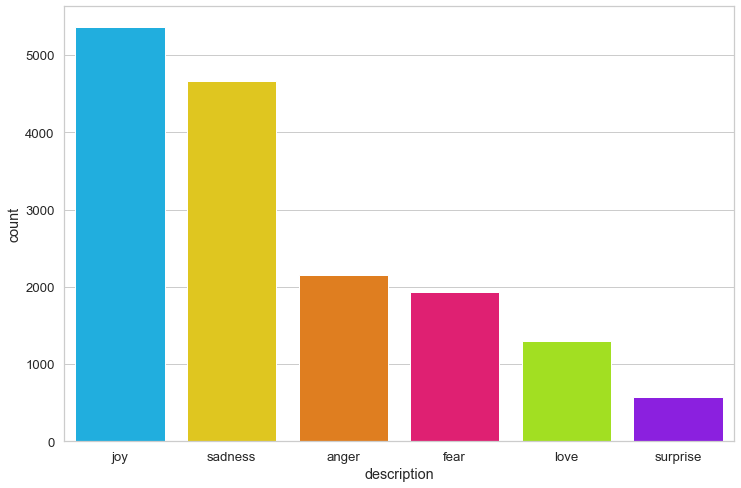

In [27]:
sns.countplot(df['description'],order = df['description'].value_counts(normalize=True).index)

## To get an idea about the text column, we are adding columns which indicates the length and number of words present in all the tweets

In [28]:
df['tweet_length'] = df['text'].astype(str).apply(len)
df['tweet_word_count'] = df['text'].apply(lambda x: len(str(x).split()))

In [29]:
df.head(5)

,text,label,description,tweet_length,tweet_word_count
0,i didnt feel humiliated,0,sadness,23,4
1,i can go from feeling so hopeless to so damned...,0,sadness,108,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,48,10
3,i am ever feeling nostalgic about the fireplac...,2,love,92,18
4,i am feeling grouchy,3,anger,20,4


Text(0.5, 0, 'Tweet Length')

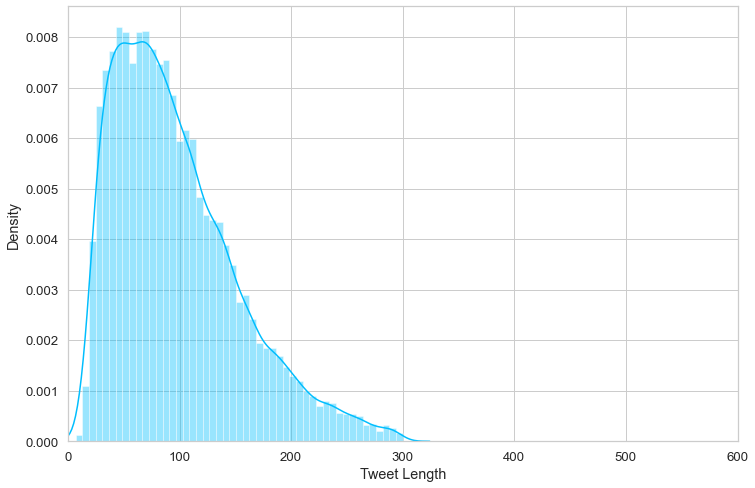

In [15]:
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
colors = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(colors))
matplotlib.rcParams['figure.figsize'] = 12, 8
sns.distplot(df['tweet_length'])
plt.xlim([0, 600]);
plt.xlabel('Tweet Length')

##### The histogram above shows that the length of the tweet ranges from around 2 to 300 characters.

### Analyze the frequency of the words per tweet per class.

<AxesSubplot:xlabel='description', ylabel='tweet_word_count'>

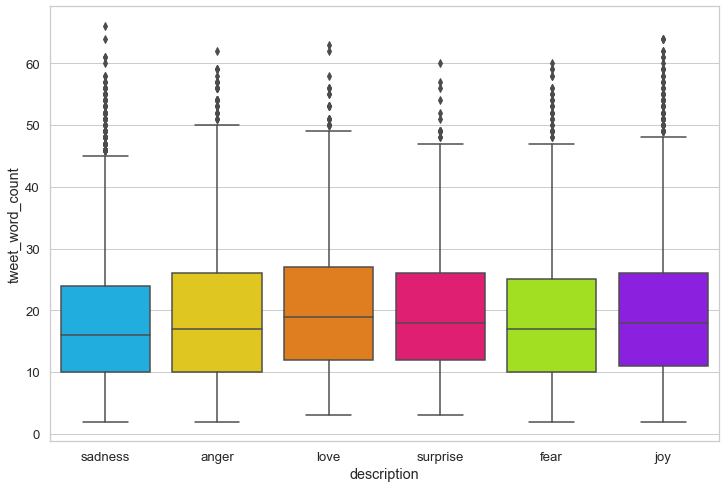

In [16]:
sns.boxplot(x="description", y="tweet_word_count", data=df)

##### Most of the tweets have an average of 16-17 words. All the tweets appear to have more or less the same length. Hence, the length of the tweet isn’t a powerful indicator of polarity.

### Some machine learning algorithms work better in the case of balanced dataset so it would be good if we can balance all the classes in the dataset

In [30]:
data = pd.DataFrame()
for i in emotions:
  temp = df[df['label']==i].iloc[:572]
  data = [data, temp]
  data = pd.concat(data)
data

,text,label,description,tweet_length,tweet_word_count
0,i didnt feel humiliated,0,sadness,23,4
1,i can go from feeling so hopeless to so damned...,0,sadness,108,21
5,ive been feeling a little burdened lately wasn...,0,sadness,65,12
10,i feel like i have to make the suffering i m s...,0,sadness,66,14
13,i feel low energy i m just thirsty,0,sadness,34,8
...,...,...,...,...,...
1601,i feel that each point is equally important th...,1,joy,53,10
1607,i feel better now,1,joy,17,4
1609,i want to feel like i m reading something wort...,1,joy,52,10
1617,i feel like reading anansi boys again its gorg...,1,joy,50,9


In [31]:
data['label'].value_counts()

0    572
2    572
4    572
1    572
3    572
5    572
Name: label, dtype: int64